### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
import joblib

### Loading dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age
- sex: (0= female, 1= male)
- cp: Chest pain
    - 0= Typical angina
    - 1= Atypical angina
    - 2= Non-anginal pain
    - 3= Asymptomatic
- trestbps: Resting blood pressure in mm Hg
- chol: Serum Cholestrol in mg/dl
- fbs: Fasting blood sugar > 120 mg/dl
    - 1= true
    - 0= false
- restecg: Resting Electrocardiographic results
    - 0= normal
    - 1= Abnormal ST-T waves on a heart test could mean there are problems with the heart
    - 2= Left ventricular hypertrophy means the heart's left pumping chamber has gotten bigger
- thalach: Maximun heart rate achieved
- exang: Exercise induced angina
    - 1= yes
    - 0= no
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of ST segment
    - 0= unsloping
    - 1= flat
    - 2= downsloping
- ca: Number of major vessels
- thal: Thallium Stress Test Result
    - 1= normal
    - 2= fixed defect
    - 3= Reversible defect
- target: (0= absence of heart disease, 1= presence of heart disease)


### Data Preprocessing

In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")

Duplicate rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2      

In [9]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print("New shape of the dataset:", df.shape)

New shape of the dataset: (302, 14)


### Exploratory Data Analysis

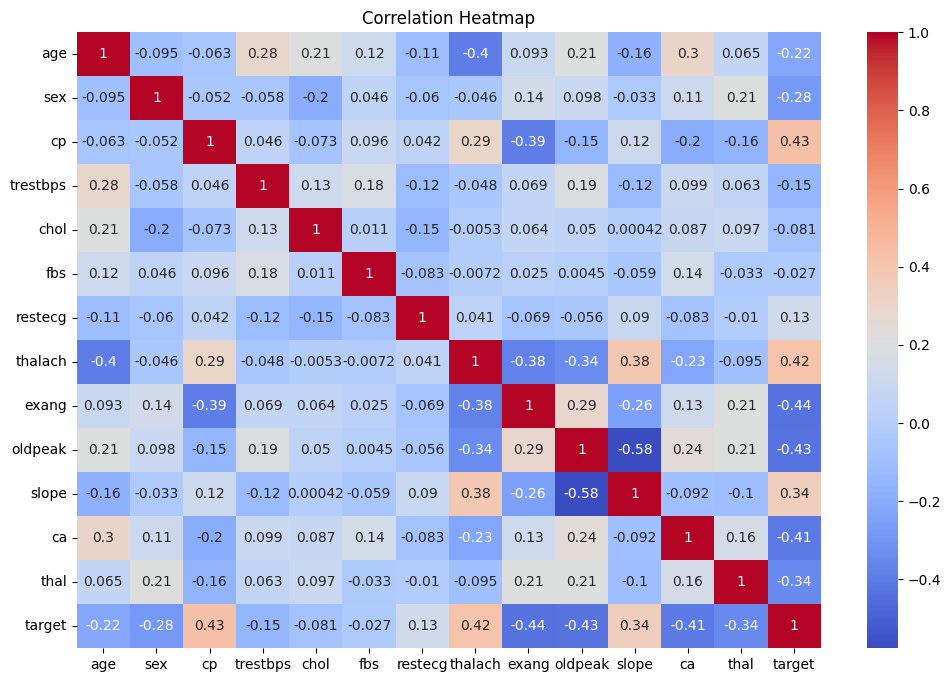

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

This heatmap illustrates the correlation between the features in the heart disease dataset. It shows that the target variable (presence of heart disease) is positively correlated with chest pain type and maximum heart rate, meaning higher values in these features are linked to a greater chance of heart disease. On the other hand, features like exercise-induced angina, ST depression, number of major vessels, and thallium test results show strong negative correlations with the target, indicating they are associated with a lower likelihood of heart disease. These patterns help identify which features are most relevant for predicting heart conditions.

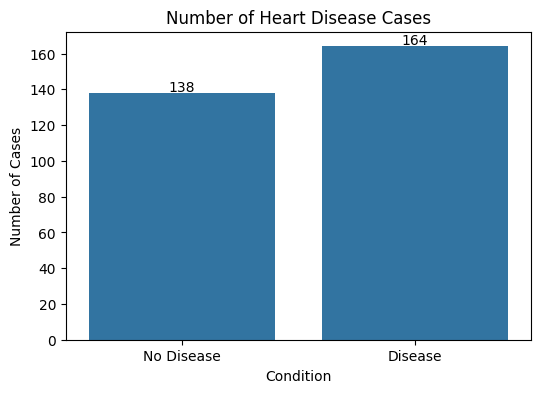

In [11]:
df_plot = df.copy()
df_plot['target'] = df_plot['target'].map({0: 'No Disease', 1: 'Disease'})

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', data=df_plot)
plt.title('Number of Heart Disease Cases')
plt.xlabel('Condition')
plt.ylabel('Number of Cases')

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

plt.show()

This bar plot shows the distribution of heart disease cases in the dataset. Out of the total samples, 164 individuals are diagnosed with heart disease, while 138 individuals do not have the condition.

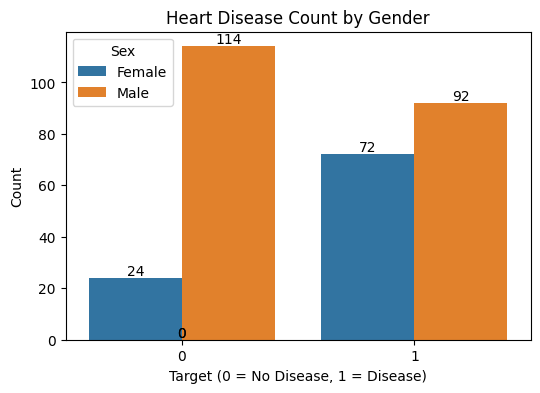

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', hue='sex', data=df)
plt.title('Heart Disease Count by Gender')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

plt.show()

This bar plot illustrates the distribution of heart disease cases by gender. Among individuals without heart disease, 114 are male and 24 are female, indicating that most of the healthy individuals in the dataset are male. On the other hand, among those diagnosed with heart disease, 92 are male and 72 are female.

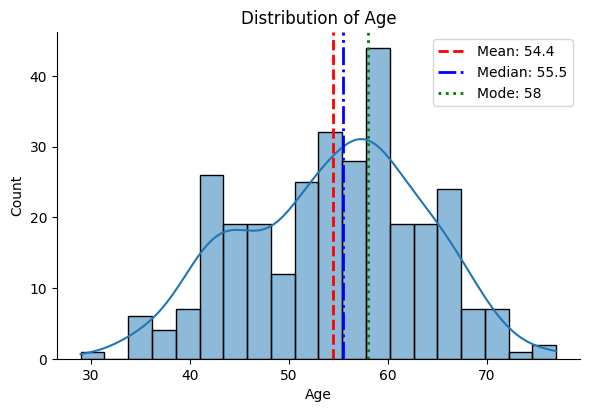

In [13]:
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]

sns.displot(df['age'], kde=True, bins=20, height=4, aspect=1.5)

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_age}')
plt.axvline(mode_age, color='green', linestyle=':', linewidth=2, label=f'Mode: {mode_age}')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

This histogram displays the distribution of ages among individuals in the dataset. The shape of the distribution appears fairly symmetrical, with most ages clustered between the late 40s and early 60s. The mean age is 54.4, the median is 55.5, and the mode is 58, all of which are relatively close to each other. This closeness suggests a roughly normal distribution, indicating no significant skew in the data. The peak around age 58 (the mode) reflects the most common age in the dataset, while the mean and median confirm that the central tendency is centered around the mid-50s.

### Splitting the data into Features & Targets

In [14]:
x = df.drop(columns='target', axis=1)
y = df['target']

### Spliting the dataset into Training data & Testing Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

### Model training (Logistics Regression)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train, y_train)

c:\Users\TLS\Desktop\Data Science Projects\Heart Disease Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = model.predict(x_test)

### Model Evaluation

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Roc AUC Score: ", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Roc AUC Score:  0.8982683982683983


In [22]:
joblib.dump(model, "heart_disease_prediction.jb")

['heart_disease_prediction.jb']